In [14]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [15]:
message = [line.rstrip() for line in open('SpamCollection')]

In [16]:
print len(message)

5574


In [17]:
for num ,message in enumerate(message[:10]):
    print num,message
    print '\n'

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

             convert                  feed               pass
 Training text ------> feature vectors --->  ML algorithms---> predictive model 
 
                                                        estimate
 New text ,image ---> feature vector -->predictive model --------> likelihood estimated 

In [20]:
#we gave the above format a column names and imported it
message = pd.read_csv('SpamCollection' , sep ='\t', names = ['label', 'message'])

In [21]:
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
#we have 2 unique feature ham and spam.most popular is ham i.e sorry call u later.
message.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [23]:
message.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [24]:
message['length']= message['message'].apply(len)
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
#longest msg is of 910 words
message['length'].describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

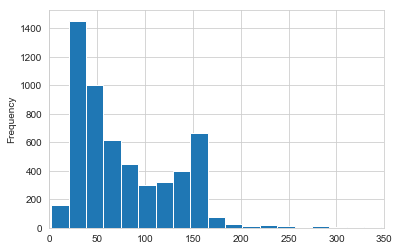

In [31]:
message['length'].plot(bins=50,kind='hist')
plt.xlim(0,350,20)
plt.show()

In [34]:
#this is the longest message
message[message['length']== 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D878CC0>,
      dtype=object)

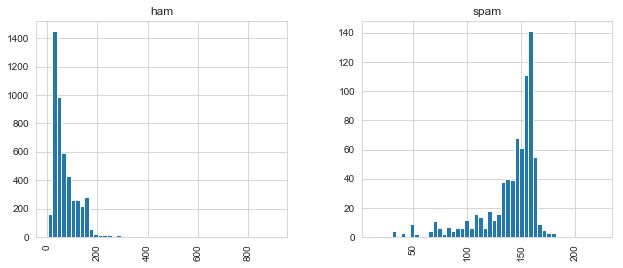

In [37]:
message.hist(column='length',by='label',bins=50,figsize=(10,4))

PART 3- PRE PROCESSING 

In [94]:
import string

In [95]:
mess = 'sample message ! notice : it has punctuation'

In [96]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [97]:
nopunc = [char for char in mess if char not in string.punctuation]

In [98]:
nopunc= ''.join(nopunc)
nopunc

'sample message  notice  it has punctuation'

In [99]:
from nltk.corpus import stopwords

In [100]:
#we removed these words as they are common and wont give us idea about ham or spam
stopwords.words('english')[0:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u"you're"]

In [101]:
nopunc.split()

['sample', 'message', 'notice', 'it', 'has', 'punctuation']

In [102]:
clean_mess= [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [103]:
#making a func to take a msg ,remove punc and the stopwords
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [104]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [105]:
#applied this func to the dataframe of message
message['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [106]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


PART 3-VECTORISING :we convert the message having list of token to vectors that algorithm model can understand

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
#bag of words transformer
bow_tran= CountVectorizer(analyzer = text_process)

In [109]:
bow_tran.fit(message['message'])

C:\Users\AMRUTA DESAI\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


CountVectorizer(analyzer=<function text_process at 0x0000000010839EB8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None,
        vocabulary=None)

In [110]:
#applied bow on 4th message only
message4= message['message'][3]

In [111]:
print message4

U dun say so early hor... U c already then say...


In [112]:
bow4=bow_tran.transform([message4])

In [113]:
#4086... are the words and then the freq they appear
print bow4

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [114]:
print bow_tran.get_feature_names()[4068]

U


In [115]:
print bow_tran.get_feature_names()[4629]

already


In [116]:
message_bow = bow_tran.transform(message['message'])

C:\Users\AMRUTA DESAI\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


In [117]:
print 'Shape of Sparse matrix:', message_bow.shape
print 'Amt of non-zero occurences' , message_bow.nnz

Shape of Sparse matrix: (5572, 11425)
Amt of non-zero occurences 50548


In [118]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_tran= TfidfTransformer().fit(message_bow)

In [119]:
tfidf4 = tfidf_tran.transform(bow4)

In [120]:
print tfidf4

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [125]:
print tfidf_tran.idf_[bow_tran.vocabulary_['U']]

3.966206571809915


In [126]:
message_tfidf = tfidf_tran.transform(message_bow)

In [128]:
print message_tfidf.shape

(5572, 11425)


PART 4- TRAINING THE MODEL

In [129]:
from sklearn.naive_bayes import MultinomialNB

In [130]:
spam_detect = MultinomialNB().fit(message_tfidf,message['label'])

In [132]:
print 'Predicted:', spam_detect.predict(tfidf4)[0]
print 'Expected:' , message['label'][3]

 Predicted: ham
Expected: ham


In [133]:
allpredict = spam_detect.predict(message_tfidf)
print allpredict

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [134]:
from sklearn.metrics import classification_report 
print classification_report(message['label'], allpredict)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

   micro avg       0.98      0.98      0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [136]:
from sklearn.model_selection import train_test_split

In [138]:
m_train,m_test,label_train,label_test= \
train_test_split(message['message'], message['label'],test_size=0.2)

In [139]:
print len(m_train),len(m_test), len(m_train)+len(m_test)

4457 1115 5572


PART 5- DATA PIPELINE

In [140]:
from sklearn.pipeline import Pipeline

In [143]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer = text_process)), 
                       ('tfidf',TfidfTransformer()) , ('classifier', MultinomialNB())])

In [144]:
pipeline.fit(m_train,label_train)

C:\Users\AMRUTA DESAI\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000000010839EB8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproces...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [145]:
predict =pipeline.predict(m_test)

C:\Users\AMRUTA DESAI\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


In [146]:
print classification_report(predict,label_test)

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1001
        spam       0.74      1.00      0.85       114

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.87      0.98      0.91      1115
weighted avg       0.97      0.96      0.97      1115

